In [1]:
# 시뮬레이션 라이브러리 불러오기
import cmath
import math
import matplotlib.pyplot as plt
import numpy as np

import meep as mp

In [2]:
# 물질 설정 및 Refractive Index 설정
mp.verbosity(0)
um_scale = 2
Air = mp.Medium(index=1.0)

In [3]:
# 설계 공간
design_region_width = 5 # 디자인 영역 너비
design_region_height = 8 # 디자인 영역 높이

# 해상도 및 사이즈 설정
resolution = 50 
gapop = 0
air_gap = 0
dti = 0.4
subpixelsize = design_region_width/3 - dti
if gapop == 1:
    air_gap = dti/2
PDsize = 2
Lpml = 1 # PML 영역 크기
pml_layers = [mp.PML(thickness = Lpml, direction = mp.Y)]
Sourcespace = 1

# 전체 공간
Sx = design_region_width
Sy = PDsize + design_region_height + Sourcespace + Lpml
cell_size = mp.Vector3(Sx, Sy)

In [4]:
# 파장, 주파수 설정
wavelengths = np.array([0.45*um_scale, 0.55*um_scale, 0.65*um_scale])
# wavelengths = np.array([1.5])
frequencies = 1/wavelengths
nf = len(frequencies) # number of frequencies

# 파장, 주파수 설정
wavelengths_400 = np.linspace(0.41*um_scale, 0.49*um_scale, 9)
wavelengths_500 = np.linspace(0.51*um_scale, 0.59*um_scale, 9) 
wavelengths_600 = np.linspace(0.61*um_scale, 0.69*um_scale, 9) 
frequencies_400 = 1/wavelengths_400
frequencies_500 = 1/wavelengths_500
frequencies_600 = 1/wavelengths_600

In [5]:
pml_layers = [mp.PML(thickness = Lpml, direction = mp.Y)]

In [6]:
# Source 설정

width = 0.4

fcen_red = 1/(0.65*um_scale)
fwidth_red = fcen_red * width

fcen_green = 1/(0.55*um_scale)
fwidth_green = fcen_green * width

fcen_blue = 1/(0.45*um_scale)
fwidth_blue = fcen_blue * width

src_0 = mp.GaussianSource(frequency=fcen_red, fwidth=fwidth_red, is_integrated=True)

src_1 = mp.GaussianSource(frequency=fcen_green, fwidth=fwidth_green, is_integrated=True)

src_2 = mp.GaussianSource(frequency=fcen_blue, fwidth=fwidth_blue, is_integrated=True)

source_center = mp.Vector3(0, Sy/ 2 - Lpml - Sourcespace / 2, 0) # Source 위치
source_size = mp.Vector3(Sx, 0, 0)

source0 = [mp.Source(src_0, component=mp.Ez, size=source_size, center=source_center, amplitude=1)]
source1 = [mp.Source(src_1, component=mp.Ez, size=source_size, center=source_center, amplitude=1)]
source2 = [mp.Source(src_2, component=mp.Ez, size=source_size, center=source_center, amplitude=1)]

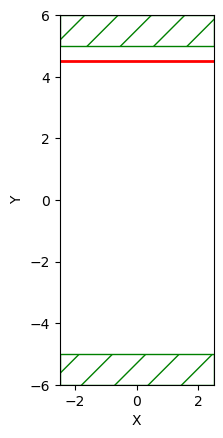

In [7]:
#red region
# Meep simulation 세팅
sim = mp.Simulation(
    cell_size=cell_size, # cell_size = mp.Vector3(Sx, Sy)
    boundary_layers=pml_layers,
    sources=source0,
    default_material=Air, # 빈공간
    resolution=resolution,
    k_point = mp.Vector3(0,0,0)
)
sim.plot2D()

tran_Ez_r0 = sim.add_dft_fields([mp.Ez], frequencies_600[0], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_r1 = sim.add_dft_fields([mp.Ez], frequencies_600[1], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_r2 = sim.add_dft_fields([mp.Ez], frequencies_600[2], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_r3 = sim.add_dft_fields([mp.Ez], frequencies_600[3], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_r4 = sim.add_dft_fields([mp.Ez], frequencies_600[4], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_r5 = sim.add_dft_fields([mp.Ez], frequencies_600[5], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_r6 = sim.add_dft_fields([mp.Ez], frequencies_600[6], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_r7 = sim.add_dft_fields([mp.Ez], frequencies_600[7], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_r8 = sim.add_dft_fields([mp.Ez], frequencies_600[8], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)

In [8]:
pt = mp.Vector3(1, -Sy/2 + PDsize - 0.5/resolution, 0) 

In [9]:
sim.run(until_after_sources=mp.stop_when_fields_decayed(10,mp.Ez,pt,1e-5))

In [10]:
array0_r = sim.get_dft_array(tran_Ez_r0, mp.Ez, 0)  
array1_r = sim.get_dft_array(tran_Ez_r1, mp.Ez, 0)  
array2_r = sim.get_dft_array(tran_Ez_r2, mp.Ez, 0)
array3_r = sim.get_dft_array(tran_Ez_r3, mp.Ez, 0)
array4_r = sim.get_dft_array(tran_Ez_r4, mp.Ez, 0)
array5_r = sim.get_dft_array(tran_Ez_r5, mp.Ez, 0)
array6_r = sim.get_dft_array(tran_Ez_r6, mp.Ez, 0)
array7_r = sim.get_dft_array(tran_Ez_r7, mp.Ez, 0)
array8_r = sim.get_dft_array(tran_Ez_r8, mp.Ez, 0)

In [11]:
print(np.abs(array0_r[0]) ** 2 +
np.abs(array1_r[0]) ** 2 +
np.abs(array2_r[0]) ** 2 +
np.abs(array3_r[0]) ** 2 +
np.abs(array4_r[0]) ** 2 +
np.abs(array5_r[0]) ** 2 +
np.abs(array6_r[0]) ** 2 +
np.abs(array7_r[0]) ** 2 +
np.abs(array8_r[0]) ** 2)

4.257666652364128


In [12]:
#green region
sim.reset_meep()
sim.sources = source1

tran_Ez_g0 = sim.add_dft_fields([mp.Ez], frequencies_500[0], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_g1 = sim.add_dft_fields([mp.Ez], frequencies_500[1], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_g2 = sim.add_dft_fields([mp.Ez], frequencies_500[2], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_g3 = sim.add_dft_fields([mp.Ez], frequencies_500[3], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_g4 = sim.add_dft_fields([mp.Ez], frequencies_500[4], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_g5 = sim.add_dft_fields([mp.Ez], frequencies_500[5], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_g6 = sim.add_dft_fields([mp.Ez], frequencies_500[6], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_g7 = sim.add_dft_fields([mp.Ez], frequencies_500[7], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_g8 = sim.add_dft_fields([mp.Ez], frequencies_500[8], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)

sim.run(until_after_sources=mp.stop_when_fields_decayed(10,mp.Ez,pt,1e-5))

array0_g = sim.get_dft_array(tran_Ez_g0, mp.Ez, 0)
array1_g = sim.get_dft_array(tran_Ez_g1, mp.Ez, 0)
array2_g = sim.get_dft_array(tran_Ez_g2, mp.Ez, 0)
array3_g = sim.get_dft_array(tran_Ez_g3, mp.Ez, 0)
array4_g = sim.get_dft_array(tran_Ez_g4, mp.Ez, 0)
array5_g = sim.get_dft_array(tran_Ez_g5, mp.Ez, 0)
array6_g = sim.get_dft_array(tran_Ez_g6, mp.Ez, 0)
array7_g = sim.get_dft_array(tran_Ez_g7, mp.Ez, 0)
array8_g = sim.get_dft_array(tran_Ez_g8, mp.Ez, 0)

print(np.abs(array0_g[0]) ** 2 +
np.abs(array1_g[0]) ** 2 +
np.abs(array2_g[0]) ** 2 +
np.abs(array3_g[0]) ** 2 +
np.abs(array4_g[0]) ** 2 +
np.abs(array5_g[0]) ** 2 +
np.abs(array6_g[0]) ** 2 +
np.abs(array7_g[0]) ** 2 +
np.abs(array8_g[0]) ** 2)

2.7407225191182802


In [13]:
#blue region
sim.reset_meep()
sim.sources = source2

tran_Ez_b0 = sim.add_dft_fields([mp.Ez], frequencies_400[0], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_b1 = sim.add_dft_fields([mp.Ez], frequencies_400[1], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_b2 = sim.add_dft_fields([mp.Ez], frequencies_400[2], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_b3 = sim.add_dft_fields([mp.Ez], frequencies_400[3], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_b4 = sim.add_dft_fields([mp.Ez], frequencies_400[4], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_b5 = sim.add_dft_fields([mp.Ez], frequencies_400[5], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_b6 = sim.add_dft_fields([mp.Ez], frequencies_400[6], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_b7 = sim.add_dft_fields([mp.Ez], frequencies_400[7], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)
tran_Ez_b8 = sim.add_dft_fields([mp.Ez], frequencies_400[8], 0 , 1, center=mp.Vector3(0, 0, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)

sim.run(until_after_sources=mp.stop_when_fields_decayed(10,mp.Ez,pt,1e-5))

array0_b = sim.get_dft_array(tran_Ez_b0, mp.Ez, 0)
array1_b = sim.get_dft_array(tran_Ez_b1, mp.Ez, 0)
array2_b = sim.get_dft_array(tran_Ez_b2, mp.Ez, 0)
array3_b = sim.get_dft_array(tran_Ez_b3, mp.Ez, 0)
array4_b = sim.get_dft_array(tran_Ez_b4, mp.Ez, 0)
array5_b = sim.get_dft_array(tran_Ez_b5, mp.Ez, 0)
array6_b = sim.get_dft_array(tran_Ez_b6, mp.Ez, 0)
array7_b = sim.get_dft_array(tran_Ez_b7, mp.Ez, 0)
array8_b = sim.get_dft_array(tran_Ez_b8, mp.Ez, 0)

print(np.abs(array0_b[0]) ** 2 +
np.abs(array1_b[0]) ** 2 +
np.abs(array2_b[0]) ** 2 +
np.abs(array3_b[0]) ** 2 +
np.abs(array4_b[0]) ** 2 +
np.abs(array5_b[0]) ** 2 +
np.abs(array6_b[0]) ** 2 +
np.abs(array7_b[0]) ** 2 +
np.abs(array8_b[0]) ** 2)


1.5701799429277332


In [14]:
print(math.sqrt(4.257666652364128/1.5701799429277332))

1.6466872211860322
